In [1]:
# trdata = ImageDataGenerator()
# tsdata = ImageDataGenerator()

# traindata = trdata.flow_from_directory(directory="../data/dataset/train",target_size=(128,128))
# testdata = tsdata.flow_from_directory(directory="../data/dataset/test", target_size=(128,128))

In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

import random
import os
tf.random.set_seed(51)
np.random.seed(51)

In [25]:
print(os.listdir(r"../data/dataset/train"))
Class_Names = os.listdir(r"../data/dataset/test")
# print(os.listdir(r"C:\Users\Chris\Documents\Flatiron\fourth_projekt\Project-The-Fourth-Pneumonia-X-Ray\data\dataset\chest_xray\val"))

['NORMAL', 'PNEUMONIA']


In [26]:
train_normal_dir = os.path.join(r"../data/dataset/train/NORMAL")
# val_normal_dir   = os.path.join(r"C:\Users\Chris\Documents\Flatiron\fourth_projekt\Project-The-Fourth-Pneumonia-X-Ray\data\dataset\chest_xray\val\NORMAL")
test_normal_dir  = os.path.join(r"../data/dataset/test/NORMAL")

train_pneumonia_dir = os.path.join(r"../data/dataset/train/PNEUMONIA")
# val_pneumonia_dir   = os.path.join(r"C:\Users\Chris\Documents\Flatiron\fourth_projekt\Project-The-Fourth-Pneumonia-X-Ray\data\dataset\chest_xray\val\PNEUMONIA")
test_pneumonia_dir  = os.path.join(r"../data/dataset/train/test/PNEUMONIA")

print('Total training normal images:', len(os.listdir(train_normal_dir)))
print('Total training pneumonia images:', len(os.listdir(train_pneumonia_dir)))

normal_images = os.listdir(train_normal_dir)
print(normal_images[:5])

pneumonia_images = os.listdir(train_pneumonia_dir)
print(pneumonia_images[:5])

Total training normal images: 1103
Total training pneumonia images: 3493
['IM-0115-0001.jpeg', 'IM-0117-0001.jpeg', 'IM-0119-0001.jpeg', 'IM-0122-0001.jpeg', 'IM-0125-0001.jpeg']
['person1000_bacteria_2931.jpeg', 'person1000_virus_1681.jpeg', 'person1001_bacteria_2932.jpeg', 'person1002_bacteria_2933.jpeg', 'person1003_bacteria_2934.jpeg']


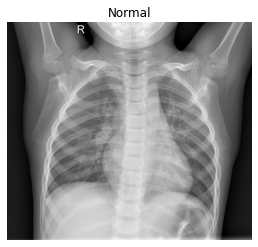

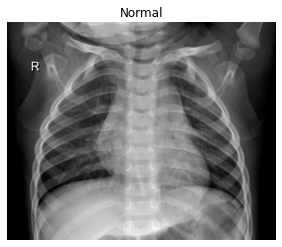

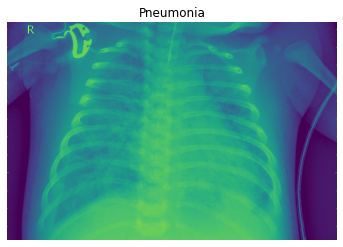

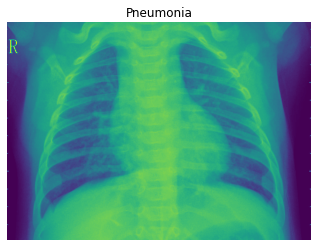

In [27]:
pic_index = 2

next_normal = [os.path.join(train_normal_dir, fname) 
                for fname in normal_images[pic_index-2:pic_index]]
next_pneumonia = [os.path.join(train_pneumonia_dir, fname)
                for fname in pneumonia_images[pic_index-2:pic_index]]

for i, img_path in enumerate(next_normal):
    img = mpimg.imread(img_path)
    plt.imshow(img, cmap = "gray")
    plt.axis('Off')
    plt.title('Normal')
    plt.show()

for i, img_path in enumerate(next_pneumonia):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.title('Pneumonia')
    plt.show()

In [28]:
train_dir = r"../data/dataset/train"

training_generator = ImageDataGenerator(rescale = 1/255,
        featurewise_center = False,  # set input mean to 0 over the dataset
        samplewise_center = False,  # set each sample mean to 0
        featurewise_std_normalization = False,  # divide inputs by std of the dataset
        samplewise_std_normalization = False,  # divide each input by its std
        zca_whitening = False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # Randomly flip inputs horizontally.
        vertical_flip = False, #Randomly flip inputs vertically
        )
train_generator = training_generator.flow_from_directory(train_dir,target_size = (96,96),batch_size = 32,
                                                       class_mode = 'categorical', classes = Class_Names)

Found 4596 images belonging to 2 classes.


In [29]:
val_dir =  '../data/dataset/val/'

validation_generator = ImageDataGenerator(rescale = 1/255)
val_generator = validation_generator.flow_from_directory(val_dir,target_size = (96, 96), batch_size = 32, class_mode='categorical', classes = Class_Names)

Found 636 images belonging to 2 classes.


In [30]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(96,96,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
          
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')  
])


In [31]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 10, 10, 128)      

In [32]:
##model.compile(optimizer = tf.keras.optimizers.Nadam(lr = 0.0001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08, decay = 0.0),loss = 'categorical_crossentropy',metrics = ['acc'])
##model.compile(optimizer = tf.keras.optimizers.Adadelta(lr=0.0001, rho=0.95, epsilon=1e-08, decay=0.0),loss = 'categorical_crossentropy',metrics = ['acc'])
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 0.001,
                                                      rho=0.90,
                                                      epsilon=1e-08,
                                                      decay=0.0),
              loss = 'categorical_crossentropy',metrics = ['acc'])
#model.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.001, momentum = 0.01, nesterov = True),loss = 'categorical_crossentropy',metrics = ['acc'])

In [33]:
!pip install plotly

In [34]:
import time
import plotly.express as px

time_start = time.process_time()

history = model.fit(train_generator,
            validation_data = val_generator,
            epochs = 50,
            batch_size = 64,
            verbose = 0)


time_end = time.process_time()
print(f'\n\nIt took: {(time_end-time_start)/60} min')

px.line(history.history)

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential_2/conv2d_8/Relu (defined at <ipython-input-34-c247a2358539>:6) ]] [Op:__inference_train_function_1754]

Function call stack:
train_function
